<h3> <center> <b> Time series Analysis </b> </center>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


### Revision

In [2]:
# Timestamp
pd.Timestamp('6th jan 2023 8:10')
# DatetimeIndex -> df and series index
pd.DatetimeIndex([pd.Timestamp('6th jan 2023 8:10'),pd.Timestamp('7th jan 2023 8:10'),pd.Timestamp('8th jan 2023 8:10')])[0]
# date_range()
pd.date_range(start='2023-1-6',end='2023-1-31',freq='D')
# to_datetime()
s = pd.Series(['2023/1/6','2023/1/7','2023/1/7'])
pd.to_datetime(s).dt.day_name()

0      Friday
1    Saturday
2    Saturday
dtype: object

### Timedelta Object

Represents a duration, the difference between two dates or times.

In [3]:
# create using Timestamp objects
t1 = pd.Timestamp("2025-9-13 16:43:15")
t2 = pd.Timestamp("2026-7-15 12:00:00")

t2-t1

Timedelta('304 days 19:16:45')

In [4]:
# standalone creation
pd.Timedelta(days=2, hours=10, minutes=35)

Timedelta('2 days 10:35:00')

In [5]:
# Arithmetic
pd.Timestamp("2025-9-13 4:43:15") + pd.Timedelta(days=2, hours=10, minutes=35)

Timestamp('2025-09-15 15:18:15')

In [6]:
pd.date_range(start='2023-1-6',end='2023-1-31',freq='D') - pd.Timedelta(days=2,hours=10,minutes=35)

DatetimeIndex(['2023-01-03 13:25:00', '2023-01-04 13:25:00',
               '2023-01-05 13:25:00', '2023-01-06 13:25:00',
               '2023-01-07 13:25:00', '2023-01-08 13:25:00',
               '2023-01-09 13:25:00', '2023-01-10 13:25:00',
               '2023-01-11 13:25:00', '2023-01-12 13:25:00',
               '2023-01-13 13:25:00', '2023-01-14 13:25:00',
               '2023-01-15 13:25:00', '2023-01-16 13:25:00',
               '2023-01-17 13:25:00', '2023-01-18 13:25:00',
               '2023-01-19 13:25:00', '2023-01-20 13:25:00',
               '2023-01-21 13:25:00', '2023-01-22 13:25:00',
               '2023-01-23 13:25:00', '2023-01-24 13:25:00',
               '2023-01-25 13:25:00', '2023-01-26 13:25:00',
               '2023-01-27 13:25:00', '2023-01-28 13:25:00'],
              dtype='datetime64[ns]', freq='D')

### 📦 Real life example of Timedelta object

In [7]:
df = pd.read_csv('deliveries.csv')

df.head()

,order_date,delivery_date
0,5/24/98,2/5/99
1,4/22/92,3/6/98
2,2/10/91,8/26/92
3,7/21/92,11/20/97
4,9/2/93,6/10/98


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   order_date     501 non-null    object
 1   delivery_date  501 non-null    object
dtypes: object(2)
memory usage: 8.0+ KB


### 📦 Average time to deliver an order

In [9]:
df['delivery_date'] = pd.to_datetime(df['delivery_date'])
df['order_date'] = pd.to_datetime(df['order_date'])

C:\Users\Lappy\AppData\Local\Temp\ipykernel_10324\710573637.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['delivery_date'] = pd.to_datetime(df['delivery_date'])


C:\Users\Lappy\AppData\Local\Temp\ipykernel_10324\710573637.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['order_date'] = pd.to_datetime(df['order_date'])


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_date     501 non-null    datetime64[ns]
 1   delivery_date  501 non-null    datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 8.0 KB


In [11]:
(df['delivery_date'] - df['order_date']).mean()

Timedelta('1217 days 22:53:53.532934128')

<hr>

### Time series

A time series is a data set that tracks a sample over time. In particular, a time series allows one to see what factors influence certain variables from period to period. Time series analysis can be useful to see how a given asset, security, or economic variable changes over time.

Examples

- Financial Data (Company stocks)
- Natural Data (Rainfall measurement)
- Event Data (Covid)
- Medical Data (Heart rate monitoring)

Types of Operations done on Time Series

- Time Series Analysis
- Time Series Forecasting

### Working on Time Series Data using Pandas

In [12]:
google = pd.read_csv('google.csv')
google.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897
3,2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276


In [13]:
google.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
4466,2022-05-16,2307.679932,2332.149902,2286.699951,2295.850098,2295.850098,1164100
4467,2022-05-17,2344.550049,2344.550049,2306.750000,2334.030029,2334.030029,1078800
4468,2022-05-18,2304.750000,2313.913086,2242.840088,2248.020020,2248.020020,1399100
4469,2022-05-19,2236.820068,2271.750000,2209.360107,2214.909912,2214.909912,1459600
4470,2022-05-20,2241.709961,2251.000000,2127.459961,2186.260010,2186.260010,1878100


In [14]:
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4471 entries, 0 to 4470
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4471 non-null   object 
 1   Open       4471 non-null   float64
 2   High       4471 non-null   float64
 3   Low        4471 non-null   float64
 4   Close      4471 non-null   float64
 5   Adj Close  4471 non-null   float64
 6   Volume     4471 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 244.6+ KB


### 🌱 **Data Preparation**

#### **1. Converting `dtype` of Date from `object` to `np.datetime64`**

In [15]:
google['Date'] = pd.to_datetime(google['Date'])

In [16]:
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4471 entries, 0 to 4470
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4471 non-null   datetime64[ns]
 1   Open       4471 non-null   float64       
 2   High       4471 non-null   float64       
 3   Low        4471 non-null   float64       
 4   Close      4471 non-null   float64       
 5   Adj Close  4471 non-null   float64       
 6   Volume     4471 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 244.6 KB


#### **2. Setting `Date` as Index of DataFrame**

In [17]:
google.set_index('Date', inplace= True)

google.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897
2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276


Now, as we have set the `Date` column as Index, we can access data for any date by passing the Date using *loc*.

In [18]:
# fetch a specific data

google.loc['2019-01-02']

Open         1.016570e+03
High         1.052320e+03
Low          1.015710e+03
Close        1.045850e+03
Adj Close    1.045850e+03
Volume       1.532600e+06
Name: 2019-01-02 00:00:00, dtype: float64

Similarly, now we can use slicing to access data for a period.

In [19]:
google.loc['2019-01-02' : '2022-05-20']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,1016.570007,1052.319946,1015.710022,1045.849976,1045.849976,1532600
2019-01-03,1041.000000,1056.979980,1014.070007,1016.059998,1016.059998,1841100
2019-01-04,1032.589966,1070.839966,1027.417969,1070.709961,1070.709961,2093900
2019-01-07,1071.500000,1074.000000,1054.760010,1068.390015,1068.390015,1981900
2019-01-08,1076.109985,1084.560059,1060.530029,1076.280029,1076.280029,1764900
...,...,...,...,...,...,...
2022-05-16,2307.679932,2332.149902,2286.699951,2295.850098,2295.850098,1164100
2022-05-17,2344.550049,2344.550049,2306.750000,2334.030029,2334.030029,1078800
2022-05-18,2304.750000,2313.913086,2242.840088,2248.020020,2248.020020,1399100


Similarly, we can now do partial indexing as we have converted the date into a DatetimeIndex object of Pandas.  
**Partial Indexing :** Partial Indexing means passing partial dates to access data.  
Let's see the examples.

🎯 Example 01 : All records of the year 2022.

In [20]:
google.loc['2019-01']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,1016.570007,1052.319946,1015.710022,1045.849976,1045.849976,1532600
2019-01-03,1041.000000,1056.979980,1014.070007,1016.059998,1016.059998,1841100
2019-01-04,1032.589966,1070.839966,1027.417969,1070.709961,1070.709961,2093900
2019-01-07,1071.500000,1074.000000,1054.760010,1068.390015,1068.390015,1981900
2019-01-08,1076.109985,1084.560059,1060.530029,1076.280029,1076.280029,1764900
2019-01-09,1081.650024,1082.630005,1066.400024,1074.660034,1074.660034,1199300
2019-01-10,1067.660034,1071.150024,1057.709961,1070.329956,1070.329956,1456400
2019-01-11,1063.180054,1063.775024,1048.479980,1057.189941,1057.189941,1520800
2019-01-14,1046.920044,1051.530029,1041.255005,1044.689941,1044.689941,1144300


In [21]:
google.loc['2021']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,1757.540039,1760.650024,1707.849976,1728.239990,1728.239990,1901900
2021-01-05,1725.000000,1747.670044,1718.015015,1740.920044,1740.920044,1145300
2021-01-06,1702.630005,1748.000000,1699.000000,1735.290039,1735.290039,2602100
2021-01-07,1740.060059,1788.400024,1737.050049,1787.250000,1787.250000,2265000
2021-01-08,1787.979980,1809.839966,1773.535034,1807.209961,1807.209961,2050600
...,...,...,...,...,...,...
2021-12-27,2949.270020,2968.530029,2945.000000,2961.280029,2961.280029,662800
2021-12-28,2967.489990,2967.489990,2918.709961,2928.959961,2928.959961,931200
2021-12-29,2928.590088,2943.675049,2910.090088,2930.090088,2930.090088,851100


#### **3. Creating Month Name, Day Name, and Quarter columns**

In [22]:
google['month_name'] = google.index.month_name()

In [23]:
google['day_name'] = google.index.day_name()

In [24]:
google['quarter'] = google.index.quarter

In [25]:
google.head()

,Open,High,Low,Close,Adj Close,Volume,month_name,day_name,quarter
Date,,,,,,,,,
2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361,August,Thursday,3
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874,August,Friday,3
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897,August,Monday,3
2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808,August,Tuesday,3
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276,August,Wednesday,3


### 🎯challenge -> fetch info for a particular date every year -> limitation of timedelta

In [26]:
dates = pd.date_range(start="2004-01-06", end="2022-01-06", freq="YS") + pd.DateOffset(days=5)

dates

DatetimeIndex(['2005-01-06', '2006-01-06', '2007-01-06', '2008-01-06',
               '2009-01-06', '2010-01-06', '2011-01-06', '2012-01-06',
               '2013-01-06', '2014-01-06', '2015-01-06', '2016-01-06',
               '2017-01-06', '2018-01-06', '2019-01-06', '2020-01-06',
               '2021-01-06', '2022-01-06'],
              dtype='datetime64[ns]', freq=None)

In [27]:
google.iloc[google.index.get_indexer(dates, method="nearest")]

,Open,High,Low,Close,Adj Close,Volume,month_name,day_name,quarter
Date,,,,,,,,,
2005-01-06,97.175758,97.584229,93.509506,93.922951,93.922951,20852067,January,Thursday,1
2006-01-06,227.581970,234.371521,225.773743,231.960556,231.960556,35646914,January,Friday,1
2007-01-05,240.349106,242.839783,238.162308,242.685349,242.685349,13795717,January,Friday,1
2008-01-07,325.749023,329.903442,317.484985,323.412781,323.412781,12854803,January,Monday,1
2009-01-06,165.868286,169.763687,162.585587,166.406265,166.406265,12898566,January,Tuesday,1
2010-01-06,311.761444,311.761444,302.047852,302.994293,302.994293,7987226,January,Wednesday,1
2011-01-06,304.199799,308.060303,303.885956,305.604523,305.604523,4131026,January,Thursday,1
2012-01-06,328.344299,328.767700,323.681763,323.796326,323.796326,5405987,January,Friday,1
2013-01-07,366.351837,368.309479,363.925903,366.003143,366.003143,3323812,January,Monday,1


In [28]:
# 📦 Nitish sir answer => little bit incorrect

pd.date_range(start='2005-1-6', end='2022-1-6', freq= pd.DateOffset(years=1))

google[google.index.isin(pd.date_range(start='2005-1-6', end='2022-1-6', freq= pd.DateOffset(years=1)))]

,Open,High,Low,Close,Adj Close,Volume,month_name,day_name,quarter
Date,,,,,,,,,
2005-01-06,97.175758,97.584229,93.509506,93.922951,93.922951,20852067,January,Thursday,1
2006-01-06,227.581970,234.371521,225.773743,231.960556,231.960556,35646914,January,Friday,1
2009-01-06,165.868286,169.763687,162.585587,166.406265,166.406265,12898566,January,Tuesday,1
2010-01-06,311.761444,311.761444,302.047852,302.994293,302.994293,7987226,January,Wednesday,1
2011-01-06,304.199799,308.060303,303.885956,305.604523,305.604523,4131026,January,Thursday,1
2012-01-06,328.344299,328.767700,323.681763,323.796326,323.796326,5405987,January,Friday,1
2014-01-06,554.426880,557.340942,551.154114,556.573853,556.573853,3551864,January,Monday,1
2015-01-06,513.589966,514.761719,499.678131,500.585632,500.585632,2899940,January,Tuesday,1
2016-01-06,730.000000,747.179993,728.919983,743.619995,743.619995,1947000,January,Wednesday,1


### It is a good question so that's why chatgpt note is attached below

Great question, Ali 👍 Let’s carefully unpack what’s going on here.

You’re trying to **select rows from a DataFrame (`google`) corresponding to the same calendar date every year (e.g., Jan 6th each year)**.

Your code:

```python
google.loc[google.index[pd.date_range(start='2005-01-06', end='2022-01-06', freq='365D')]]
```

### 🔎 Issues in the Code

1. **`freq='365D'` is not the same as "one calendar year":**

   * `"365D"` means *exactly 365 days*, but calendar years are not all 365 days (leap years have 366).
   * So your sequence drifts — e.g., from `2005-01-06` → `2006-01-06` is fine, but by the time you cross leap years, it shifts off from Jan 6.

   👉 Correct annual frequencies: `"A"` or `"AS"` (year-end or year-start), not `"365D"`.

2. **Index alignment:**

   * `google.index[...]` assumes the generated dates from `pd.date_range` exist exactly in `google.index`.
   * If `google.index` is not a perfect daily sequence (e.g., missing weekends/holidays in stock data), many dates won’t match, leading to a **KeyError** or empty result.

---

### ✅ Correct Approaches

#### 1. If you want **Jan 6th every year (exact calendar date)**:

```python
dates = pd.date_range(start="2005-01-06", end="2022-01-06", freq="AS") + pd.DateOffset(days=5)
google.loc[google.index.intersection(dates)]
```

* `"AS"` → annual start (Jan 1st every year).
* `+ pd.DateOffset(days=5)` → shifts to Jan 6th.
* `.intersection(...)` ensures only dates present in your data are selected (important for market holidays).

---

#### 2. If you want the **closest available trading day to Jan 6th**:

```python
dates = pd.date_range(start="2005-01-06", end="2022-01-06", freq="AS") + pd.DateOffset(days=5)
google.loc[google.index.get_indexer(dates, method="nearest")]
```

---

#### 3. If you want to filter by **month/day ignoring year**:

```python
google[ (google.index.month == 1) & (google.index.day == 6) ]
```

👉 This works even if some years miss Jan 6 (due to weekends/holidays).

---

### 🚩 Key takeaway:

* Don’t use `"365D"` for yearly data → use `"A"`, `"AS"`, or `"YS"`.
* Handle leap years + missing trading days with `.intersection()` or `method="nearest"`.

---

Ah, perfect follow-up 🚀 You’ve zeroed in on the subtlety. Let’s carefully analyze **why this line fails**:

```python
dates = pd.date_range(start="2005-01-06", end="2022-01-06", freq="YS") + pd.DateOffset(days=5)
google.loc[dates]
```

---

### 1️⃣ What `pd.date_range(..., freq="YS")` does

* `"YS"` = **Year Start frequency** → gives **Jan 1st of every year**.
  So before shifting, your `dates` look like:

```
2005-01-01, 2006-01-01, ..., 2022-01-01
```

After `+ pd.DateOffset(days=5)`, they become:

```
2005-01-06, 2006-01-06, ..., 2022-01-06
```

✅ Exactly the dates you want.

---

### 2️⃣ Why `google.loc[dates]` fails

`DataFrame.loc[...]` expects that **every key you pass must exist in the index**.

* But `google` likely has a **DatetimeIndex of trading days** (since it’s stock data).
* Example: If **Jan 6, 2007** was a Saturday, there won’t be a row with that date in your index.
* When `.loc` sees a missing label, it raises a **KeyError**.

That’s why the line doesn’t work directly.

---

### 3️⃣ Fixing the problem

You have two choices:

#### (a) **Strict intersection** (only keep dates that exist)

```python
google.loc[google.index.intersection(dates)]
```

#### (b) **Nearest available trading day** (if Jan 6 is missing, get the closest)

```python
google.loc[google.index.get_indexer(dates, method="nearest")]
```

---

### ⚖️ Key insight

* `.loc[dates]` only works if **all `dates` exist in the index**.
* Since trading calendars skip weekends & holidays, many `dates` won’t be present.
* That’s why you need `.intersection()` or `.get_indexer()` instead of raw `.loc`.

---

👉 Quick check for you: If you run

```python
set(dates) - set(google.index)
```

you’ll see exactly **which Jan 6ths are missing** from your data.

---





#### **1. Open Column Visualization**

Text(0.5, 1.0, 'Opening Price')

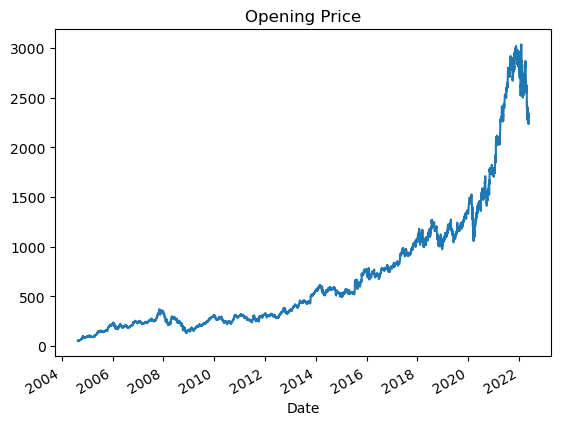

In [29]:
google['Open'].plot()

plt.title('Opening Price')

#### **2. Close Column Visualization**

Text(0.5, 1.0, 'Closing Price')

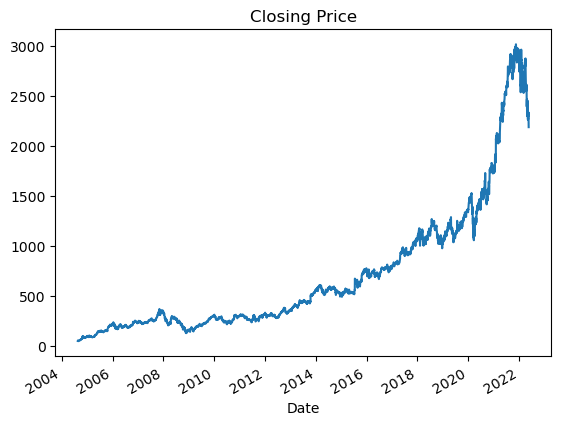

In [30]:
google['Close'].plot()
plt.title('Closing Price')

#### **3. High Column Visualization**

Text(0.5, 1.0, 'Highest Price')

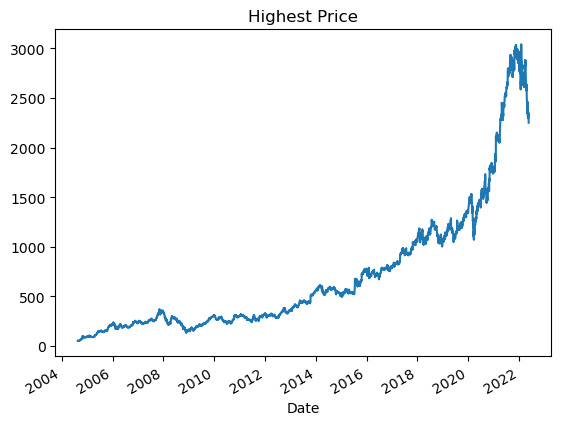

In [31]:
google['High'].plot()
plt.title('Highest Price')

#### **4. Low Column Visualization**

Text(0.5, 1.0, 'Lowest Price')

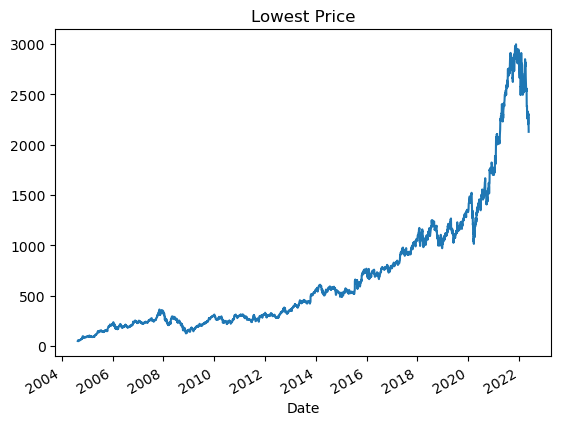

In [32]:
google['Low'].plot()
plt.title('Lowest Price')

#### **5. PLotting multiple columns together**

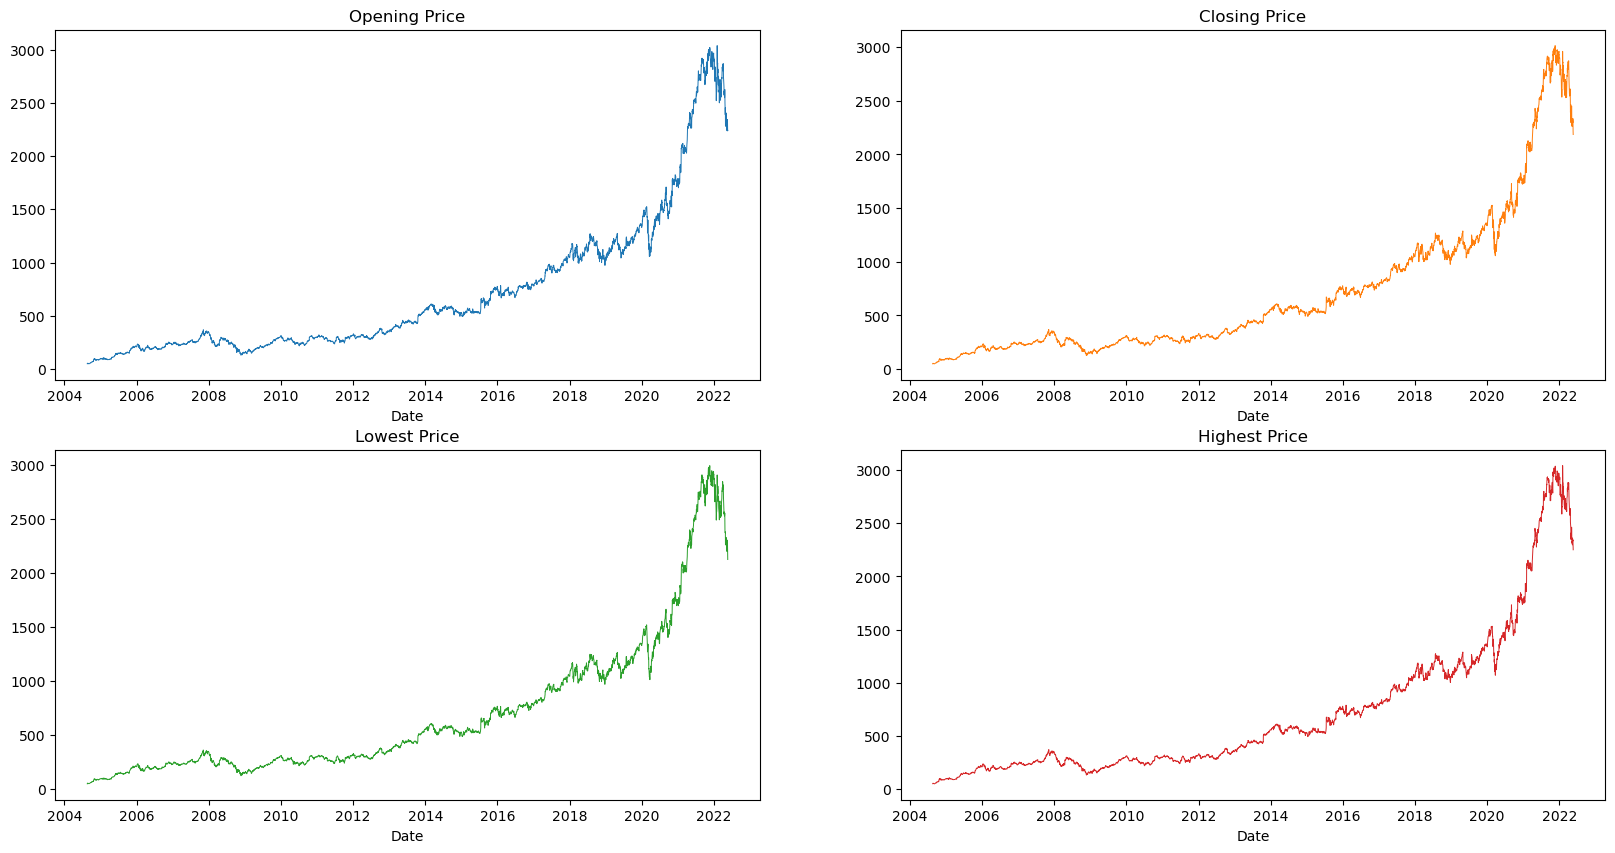

In [33]:
columns_to_plot = ['Open', 'Close', 'Low', 'High']
ax = google[columns_to_plot].plot(
    subplots = True,
    layout= (2,2),
    sharex = False,
    sharey = False,
    linewidth = 0.7,
    fontsize = 10,
    legend = False,
    figsize= (20,10),
    title = ['Opening Price', 'Closing Price', 'Lowest Price', 'Highest Price']
)


#### **6. Plot for a particular year/month/weeks**

<Axes: xlabel='Date'>

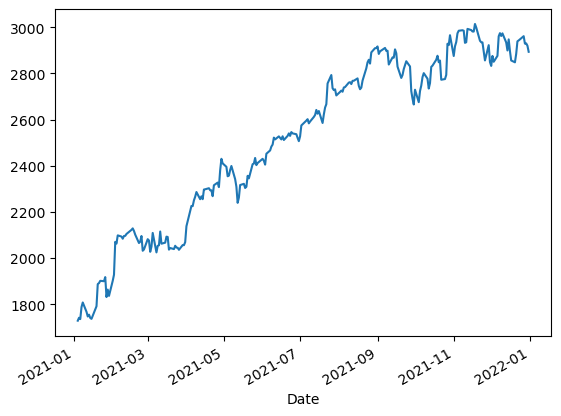

In [34]:
# Year plot
google.loc['2021']['Close'].plot()

<Axes: xlabel='Date'>

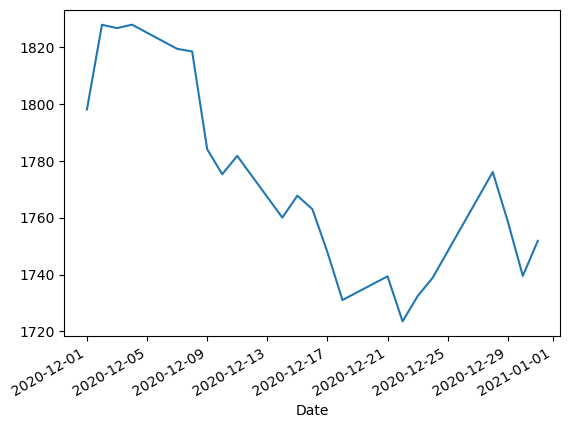

In [35]:
# Month plot
google.loc['2020-12']['Close'].plot()

#### **Frequency**

In [36]:
google.index # abhi dekhoge too niche koi frequency nhi hai index me

DatetimeIndex(['2004-08-19', '2004-08-20', '2004-08-23', '2004-08-24',
               '2004-08-25', '2004-08-26', '2004-08-27', '2004-08-30',
               '2004-08-31', '2004-09-01',
               ...
               '2022-05-09', '2022-05-10', '2022-05-11', '2022-05-12',
               '2022-05-13', '2022-05-16', '2022-05-17', '2022-05-18',
               '2022-05-19', '2022-05-20'],
              dtype='datetime64[ns]', name='Date', length=4471, freq=None)

In [42]:
# asfreq

google.asfreq('D') # niche kuch jagah par NAN aagya because we set the frequency as daily and those place do not have any 

,Open,High,Low,Close,Adj Close,Volume,month_name,day_name,quarter
Date,,,,,,,,,
2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361.0,August,Thursday,3.0
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874.0,August,Friday,3.0
2004-08-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897.0,August,Monday,3.0
...,...,...,...,...,...,...,...,...,...
2022-05-16,2307.679932,2332.149902,2286.699951,2295.850098,2295.850098,1164100.0,May,Monday,2.0
2022-05-17,2344.550049,2344.550049,2306.750000,2334.030029,2334.030029,1078800.0,May,Tuesday,2.0
2022-05-18,2304.750000,2313.913086,2242.840088,2248.020020,2248.020020,1399100.0,May,Wednesday,2.0


In [41]:
google = google.asfreq('B') 

In [54]:
google.head()

,Open,High,Low,Close,Adj Close,Volume,month_name,day_name,quarter
Date,,,,,,,,,
2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361.0,August,Thursday,3.0
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874.0,August,Friday,3.0
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897.0,August,Monday,3.0
2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808.0,August,Tuesday,3.0
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276.0,August,Wednesday,3.0


#### **Quarterly Plot**

<Axes: xlabel='Date'>

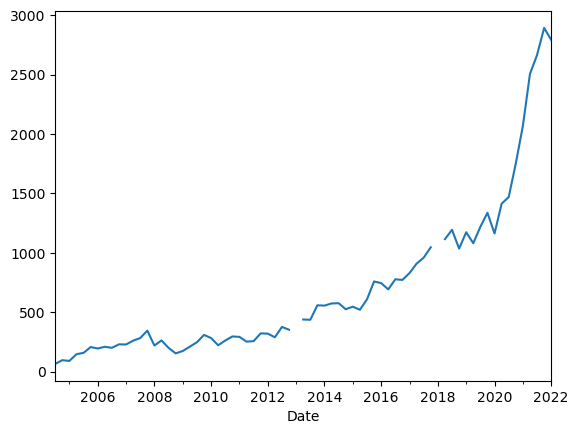

In [ ]:
# Quarterly plot

google.asfreq('QE', method='ffill')['Close'].plot() # There will be some NAN values because there are some 30 and 31 both are off day, so 31 is gonna be NAN.


Bahut acha sawal 👌, yeh confusion naturally aata hai jab **`asfreq` + `ffill`** use karte ho. Chalo step-by-step samajhte hain:

---

### 🔍 Tumhari Code Line

```python
google.asfreq('QE', method='ffill')
```

---

### 1️⃣ `asfreq('QE')` kya karta hai?

* Yeh tumhare **Date index** ko **quarter-end (QE)** frequency pe reindex kar deta hai.
* Matlab har quarter ke **31 March, 30 June, 30 Sept, 31 Dec** (exact calendar date) row banegi.
* Agar tumhare data me us din trading nahi hui (weekend/holiday), to woh row **NaN** ban jayegi.

---

### 2️⃣ `method='ffill'` kaise kaam karta hai?

* `ffill` ka matlab hai: *"Agar ek nayi date aa gayi hai jiska data missing hai, to uske pehle waali available value se bhardo."*
* Lekin dikkat yeh hai ki `asfreq` ke time pe Pandas **sirf wahi dates fill karta hai jo tumhare index me continuous hain**.

👉 Example:

* Tumhare paas `2018-03-29` (Thursday) tak ka data hai.
* Agla quarter-end `2018-03-31` (Saturday) hai.
* `asfreq('QE')` is date ko add karega, lekin **2018-03-30** bhi nahi hai index me (kyunki woh Friday non-trading hoga ya missing hai).
* `ffill` tab kaam karta hai jab *directly pichhli row* index me hoti hai. Lekin yahan gap hai, isliye woh **NaN hi rahega**.

---

### 3️⃣ Isliye NaN kyu fill nahi ho raha?

Kyuki `asfreq` ekdum naya index bana raha hai aur tumhare dataset me **wo dates exist hi nahi karte** (jaise 2018-03-31).
`ffill` usko bhar nahi paa raha kyunki us date ke bilkul pehle koi valid value align nahi hui hai.

---

### ✅ Solution (2 Tareeke)

1. **Resample ka use karo (Recommended for stock data):**

   ```python
   google['Close'].resample('Q').last()
   ```

   Ye har quarter ka **last available trading day close price** dega → koi NaN nahi.

2. **asfreq ke baad manually ffill lagao:**

   ```python
   google.asfreq('QE')['Close'].ffill()
   ```

   Matlab pehle reindex karo QE pe, fir baad me missing values forward-fill kar do.

---

### 🔑 Key Difference

* `asfreq(..., method='ffill')` → fill karta hai **sirf jab gap 1 step ho**.
* `.ffill()` baad me lagane se → poore column ko continuously fill kar deta hai, chahe kitna bhi gap ho.

---

👉 Ab batao, tumhe graph me **sirf trading days ke last quarter value** chahiye (finance style), ya tumhe **har quarter-end calendar date pe ek value** chahiye (chahe wo trading day ho ya na ho)?


In [73]:
google.asfreq('QE', method='ffill').tail(20)

,Open,High,Low,Close,Adj Close,Volume,month_name,day_name,quarter
Date,,,,,,,,,
2017-06-30,926.049988,926.049988,908.309998,908.729980,908.729980,2090200.0,June,Friday,2.0
2017-09-30,952.000000,959.786011,951.510010,959.109985,959.109985,1581000.0,September,Friday,3.0
2017-12-31,1046.719971,1049.699951,1044.900024,1046.400024,1046.400024,887500.0,December,Friday,4.0
2018-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-30,1120.000000,1128.227051,1115.000000,1115.650024,1115.650024,1315100.0,June,Friday,2.0
2018-09-30,1191.869995,1195.410034,1184.500000,1193.469971,1193.469971,1380600.0,September,Friday,3.0
2018-12-31,1050.959961,1052.699951,1023.590027,1035.609985,1035.609985,1493300.0,December,Monday,4.0
2019-03-31,1174.900024,1178.989990,1162.880005,1173.310059,1173.310059,1269900.0,March,Friday,1.0
2019-06-30,1076.390015,1081.000000,1073.369995,1080.910034,1080.910034,1693200.0,June,Friday,2.0


<Axes: title={'center': 'Google Quarterly (asfreq + ffill)'}, xlabel='Date'>

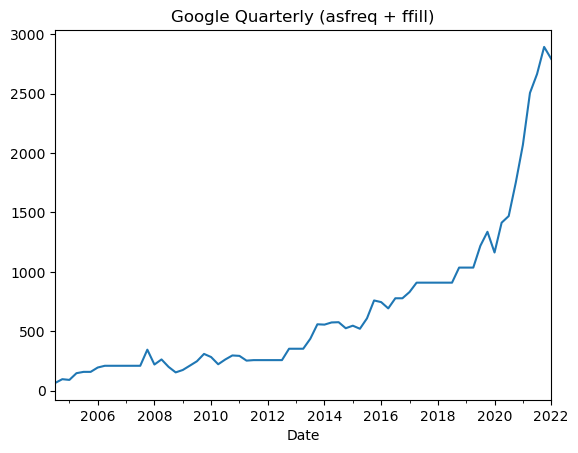

In [56]:
google.asfreq('QE')['Close'].ffill().plot(title="Google Quarterly (asfreq + ffill)")


Got it 👍 You want to **plot Google stock price quarterly** using Pandas, but you’re stuck on the **logic for resampling/grouping the data**. Let’s build this step by step.

---

## 🛠 Step 1: Import and Load Data

Usually stock price data has a **Date column** and a **Price column** (like `Close`).
Make sure `Date` is a `datetime` type and set it as index.

```python
import pandas as pd
import matplotlib.pyplot as plt

# Example: load data
df = pd.read_csv("google_stock.csv")

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set Date as index (important for resampling)
df.set_index('Date', inplace=True)

# Check structure
print(df.head())
```

---

## 🛠 Step 2: Resample Quarterly

Now the logic:

* Stock data is usually **daily**.
* To make it **quarterly**, we can use Pandas **`resample`** with `'Q'` (quarter-end frequency).

For example, to get the **quarterly average closing price**:

```python
quarterly = df['Close'].resample('Q').mean()
print(quarterly.head())
```

Other options:

* `.last()` → price at the end of quarter
* `.first()` → price at the start of quarter
* `.max()` / `.min()` → high / low of the quarter

---

## 🛠 Step 3: Plot

```python
plt.figure(figsize=(10,5))
plt.plot(quarterly.index, quarterly.values, marker='o', linestyle='-', color='b')
plt.title("Google Stock Price (Quarterly Average)")
plt.xlabel("Quarter")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.show()
```

---

## 🔑 Key Idea (Logic Behind the Code)

* Daily stock prices → indexed by **date**
* **Resample** groups them into **3-month chunks**
* Apply an aggregation (`mean`, `last`, etc.)
* Plot the resampled data

---

⚡ Example: If you want the **quarter-end closing price** (most common for financial charts):

```python
quarterly_close = df['Close'].resample('Q').last()

quarterly_close.plot(marker='o', figsize=(10,5), title="Google Stock Quarterly Close Price")
plt.show()
```

---

Ah, I see where you’re running into trouble 👀. Let’s carefully debug this.

---

### Your code:

```python
google.asfreq('QE', method='ffill')['Close'].plot()
```

---

### 🔍 What’s happening?

1. **`asfreq('QE')`**

   * `asfreq` changes the **frequency of the index** to exactly quarter-end dates (every 3 months).
   * It does **not aggregate**, it just reindexes.
   * If your data doesn’t exactly line up with quarter-end dates, Pandas will insert **NaN values**.

   Example:

   * If your data is daily up to `"2025-03-30"` but quarter-end is `"2025-03-31"`, then that `"2025-03-31"` row will be NaN.

2. **`method='ffill'`**

   * You’re telling Pandas: “If there’s a missing value, forward-fill from the last known value.”
   * This works only if there is *at least one prior date*.
   * But if you have gaps at the *start* (like before the first quarter-end), you’ll still get NaNs.

3. **Why the gaps in your plot?**

   * Those NaNs remain → Matplotlib plots them as breaks (gaps).
   * In financial data, this happens often because quarter-end dates may be **weekends/holidays**, so there’s no trading data on that day.

---

### ✅ Fix: Use `resample` instead of `asfreq`

If your goal is a **continuous quarterly graph**, the right tool is `resample`, not `asfreq`.

For quarter-end **last closing price** (typical in finance):

```python
google['Close'].resample('Q').last().plot(title="Google Quarterly Close")
```

For quarter-end **average closing price**:

```python
google['Close'].resample('Q').mean().plot(title="Google Quarterly Avg Close")
```

Both avoid gaps, because `resample` groups data into quarters and calculates something meaningful.

---

### 🚑 If you *really* want `asfreq` (not recommended here):

You can handle the missing points more aggressively:

```python
google.asfreq('QE')['Close'].ffill().plot(title="Google Quarterly (asfreq + ffill)")
```

But still, `resample` is cleaner for quarterly charts.
---


#### **6. Dynamic Quarter Visualization of Any Column**

**Function :** Defining a function to ease the process and a little bit dynamic.

In [66]:
def visualize_quarter_values(q:int,column:str) :
    desired_df = google[column][google['quarter'] == q]
    desired_df.plot()
    return

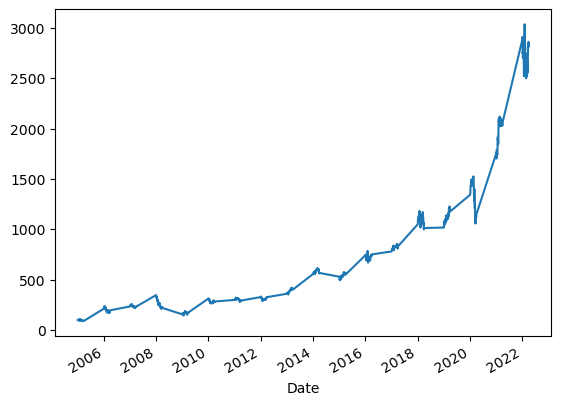

In [68]:
visualize_quarter_values(1,'Open')

#### **Which months, price of the stocks goes up most (monthly trend)**

Data processing karna padega monthly trend ke liye

#### **Creating the Daily Stock Return Column**  

Great move 👍 adding **daily returns** is one of the first steps in stock data analysis. Let’s do it properly on your dataset.

---

### 📌 Formula for Daily Return

Daily return is the **percentage change in closing price** from one day to the next:

$$
\text{Daily Return}_t = \frac{Close_t - Close_{t-1}}{Close_{t-1}} \times 100
$$

In Pandas, this is super easy using `.pct_change()`.

---

### ✅ Code

```python
# Calculate daily return based on 'Close'
google['daily_return'] = google['Close'].pct_change() * 100  # in percentage

print(google[['Close', 'daily_return']].head(10))
```

---

### 📊 Example Output (illustrative)

| Date       | Close  | daily\_return |
| ---------- | ------ | ------------- |
| 2016-03-31 | 744.95 | NaN           |
| 2016-06-30 | 692.09 | -7.08         |
| 2016-09-30 | 777.29 | +12.31        |
| 2016-12-31 | 771.82 | -0.70         |
| 2017-03-31 | 829.56 | +7.48         |

👉 First row is always `NaN` since there’s no previous day to compare with.

---

### 🔑 Notes

* If you prefer **decimal returns** instead of percentages (e.g., 0.07 instead of 7%), just skip `* 100`.
* You can also use other columns like `"Adj Close"` instead of `"Close"` (Adj Close is often better for returns since it adjusts for stock splits and dividends).

---


In [94]:
google['daily_return'] = google['Close'].pct_change()

google.head()

C:\Users\Lappy\AppData\Local\Temp\ipykernel_10324\169657874.py:1: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  google['daily_return'] = google['Close'].pct_change()


,Open,High,Low,Close,Adj Close,Volume,month_name,day_name,quarter,return,daily_return
Date,,,,,,,,,,,
2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361.0,August,Thursday,3.0,0.169365,NaN
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874.0,August,Friday,3.0,3.636368,0.079430
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897.0,August,Monday,3.0,-0.672482,0.010064
2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808.0,August,Tuesday,3.0,-3.173103,-0.041408
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276.0,August,Wednesday,3.0,0.518059,0.010775


<Axes: xlabel='month_name'>

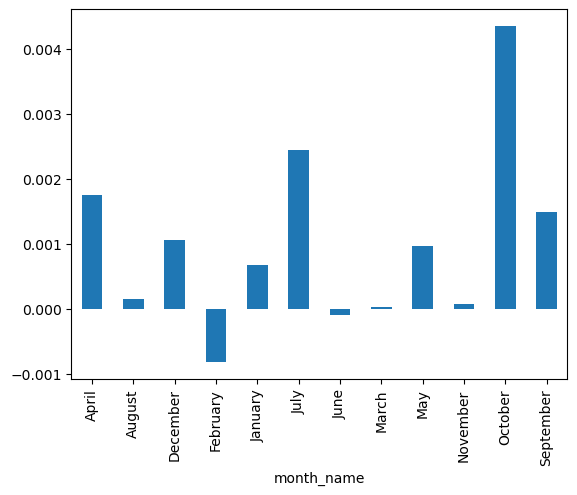

In [95]:
google.groupby('month_name')['daily_return'].mean().plot(kind='bar')

### 🎲 **Resampling**

Resampling involves changing the frequency of your time series observations.  
Two types of resampling are:  
- **Upsampling :** Where you increase the frequency of the samples, such as from minutes to seconds.  
- **Downsampling :** Where you decrease the frequency of the samples, such as from days to months.  

The Pandas method used to do resampling is [`pd.DataFrame.resample()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html#pandas-dataframe-resample) or [`pd.Series.resample()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.resample.html#pandas-series-resample) method.

#### 👇 **Downsampling**

Keep in mind that when downsampling is done there is need of specifying two things.  
1. freq : It uses the Offset Aliases to determine the frequency.
2. aggregation function : It is used so that the insight of the data do not get lost.

<Axes: xlabel='Date'>

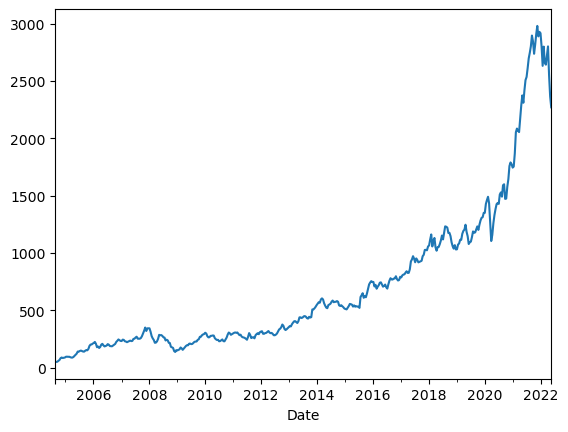

In [137]:
google['Close'].resample('2W').mean().plot()

C:\Users\Lappy\AppData\Local\Temp\ipykernel_10324\2095204071.py:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  google['Close'].resample('M').mean().plot(ax=axes[3], label="Monthly Avg",  title="Monthly Avg")
C:\Users\Lappy\AppData\Local\Temp\ipykernel_10324\2095204071.py:26: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  google['Close'].resample('Q').mean().plot(ax=axes[4], label="Quarterly Avg",title="Quarterly Avg")
C:\Users\Lappy\AppData\Local\Temp\ipykernel_10324\2095204071.py:29: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  google['Close'].resample('Y').mean().plot(ax=axes[5], label="Yearly Avg", linewidth=2, title="Yearly Avg")


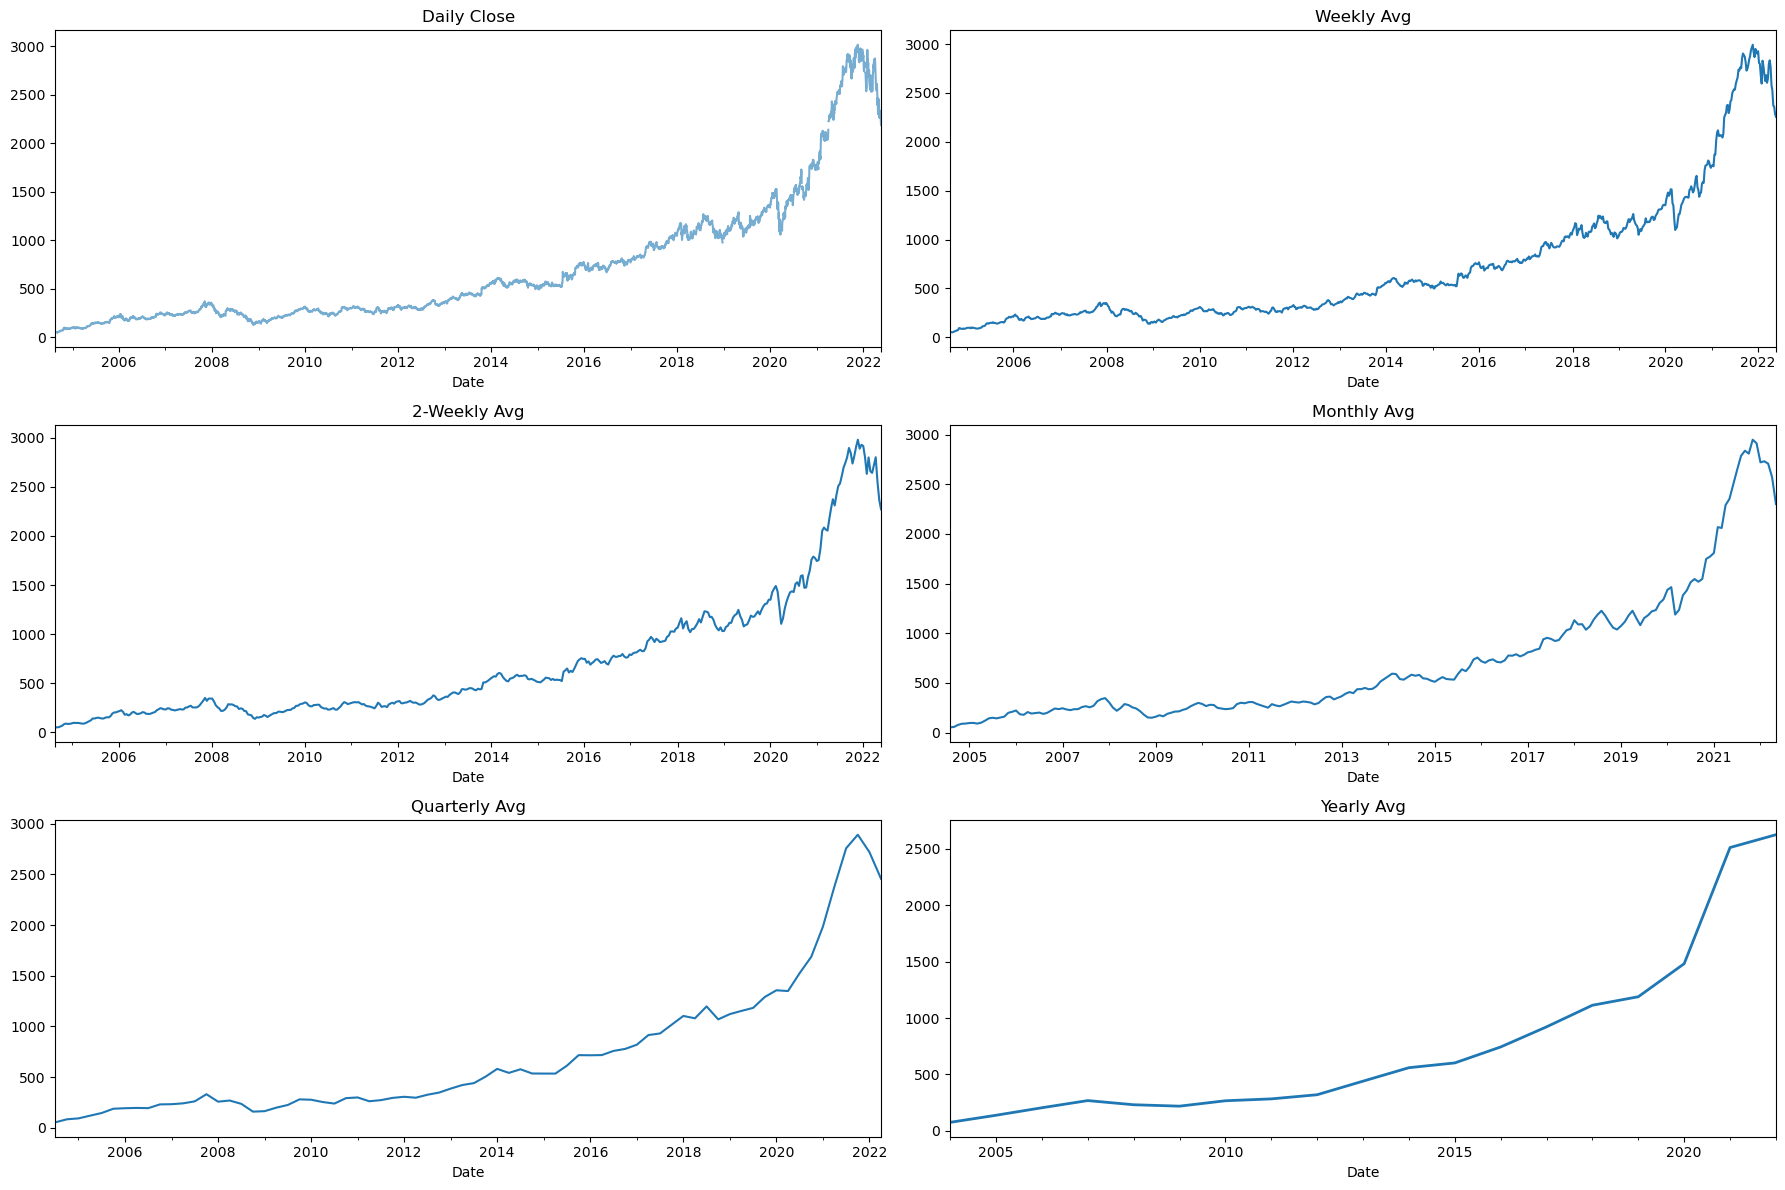

In [129]:
# Create figure and axes grid (3 rows, 2 cols → 6 slots, but we only need 5)
fig, ax = plt.subplots(
    nrows=3,
    ncols=2,
    sharex=False,
    sharey=False,
    figsize=(18, 12)
)

# Flatten 2D array of axes into 1D list for easier indexing
axes = ax.flatten()

# Original daily close
google['Close'].plot(ax=axes[0], label="Daily Close", alpha=0.6, title="Daily Close")

# Weekly mean
google['Close'].resample('W').mean().plot(ax=axes[1], label="Weekly Avg",  title="Weekly Avg")

# 2 week mean
google['Close'].resample('2W').mean().plot(ax=axes[2], label="2-Weekly Avg",  title="2-Weekly Avg")

# Monthly mean
google['Close'].resample('M').mean().plot(ax=axes[3], label="Monthly Avg",  title="Monthly Avg")

# Quarterly mean
google['Close'].resample('Q').mean().plot(ax=axes[4], label="Quarterly Avg",title="Quarterly Avg")

# Yearly mean
google['Close'].resample('Y').mean().plot(ax=axes[5], label="Yearly Avg", linewidth=2, title="Yearly Avg")


# Adjust layout
plt.tight_layout()
plt.show()

#### 👆 **Upsampling**  

While performing Upsampling, we need to to keep this in mind.  
- When Upsampling is done, a lot of new Timestamps are created.  
  So, we have to fill those with the help of interpolate function.  
- While using interpolate function for upsampling, we need to choose the suitable method among the available ones.

In [131]:
# Up sampling

google['Close'].resample('12H',).interpolate('linear')

C:\Users\Lappy\AppData\Local\Temp\ipykernel_10324\4271739268.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  google['Close'].resample('12H',).interpolate('linear')


Date
2004-08-19 00:00:00      49.982655
2004-08-19 12:00:00      51.967713
2004-08-20 00:00:00      53.952770
2004-08-20 12:00:00      54.043264
2004-08-21 00:00:00      54.133758
                          ...     
2022-05-18 00:00:00    2248.020020
2022-05-18 12:00:00    2231.464966
2022-05-19 00:00:00    2214.909912
2022-05-19 12:00:00    2200.584961
2022-05-20 00:00:00    2186.260010
Freq: 12h, Name: Close, Length: 12967, dtype: float64

C:\Users\Lappy\AppData\Local\Temp\ipykernel_10324\1580557382.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  google['Close'].resample('12H',).interpolate('linear').plot()


<Axes: xlabel='Date'>

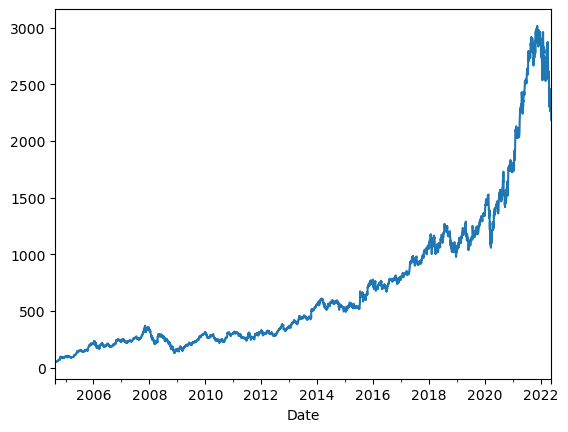

In [133]:
google['Close'].resample('12H',).interpolate('linear').plot()

In [132]:
google['Close'].resample('12H',).interpolate('spline', order=2)

C:\Users\Lappy\AppData\Local\Temp\ipykernel_10324\4282151020.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  google['Close'].resample('12H',).interpolate('spline', order=2)


Date
2004-08-19 00:00:00      49.982655
2004-08-19 12:00:00      52.309914
2004-08-20 00:00:00      53.952770
2004-08-20 12:00:00      55.591467
2004-08-21 00:00:00      56.388783
                          ...     
2022-05-18 00:00:00    2248.020020
2022-05-18 12:00:00    2365.166742
2022-05-19 00:00:00    2214.909912
2022-05-19 12:00:00    2065.798809
2022-05-20 00:00:00    2186.260010
Freq: 12h, Name: Close, Length: 12967, dtype: float64

C:\Users\Lappy\AppData\Local\Temp\ipykernel_10324\945873990.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  google['Close'].resample('12H',).interpolate('spline', order=2).plot()


<Axes: xlabel='Date'>

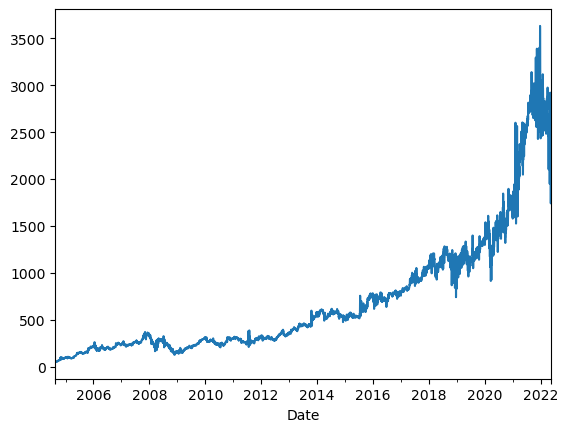

In [135]:
google['Close'].resample('12H',).interpolate('spline', order=2).plot()

Perfect timing 🚀 — resampling is one of the most **powerful tools** in time series analysis with pandas.
Since you’re focusing on **upsampling** (converting a lower frequency to a higher one), I’ll give you a **complete, detailed guide** — starting from basics to advanced, so nothing is left behind.

---

# 📌 Resampling in Pandas

Resampling = changing the **frequency** of your time series.

* **Downsampling** = higher frequency → lower frequency (e.g., daily → monthly).
* **Upsampling** = lower frequency → higher frequency (e.g., monthly → daily).

---

# 🔼 Upsampling (Your Topic)

**Definition:** Increasing the frequency of your time series, i.e., introducing more rows (timestamps) than the original data had.

Example:
If you have **monthly stock prices**, and you upsample to **daily**, pandas creates new daily rows → but the **new values are missing (NaN)** because they didn’t exist in the original dataset.

---

## 📖 Key Methods for Upsampling

### 1. `.resample()`

Main tool for resampling:

```python
google['Close'].resample('D').asfreq()
```

* `'D'` → daily frequency.
* `asfreq()` = simply reindexes without filling missing values → new daily rows with NaN.

---

### 2. `.asfreq()`

Direct shortcut for “reindex with new frequency”:

```python
google['Close'].asfreq('D')
```

This = `resample('D').asfreq()`.

---

### 3. Filling NaN values after Upsampling

Since upsampling introduces missing values, you almost always need to **fill or interpolate**.

#### a) Forward Fill (propagates last known value)

```python
google['Close'].resample('D').ffill()
```

#### b) Backward Fill (uses next available value)

```python
google['Close'].resample('D').bfill()
```

#### c) Interpolation (estimates in between values)

```python
google['Close'].resample('D').interpolate(method='linear')
```

Other interpolation methods: `'time'`, `'polynomial'`, `'spline'`, `'nearest'`.

---

### 4. Using `.pad()` and `.backfill()`

These are shorthand for `ffill` and `bfill`.

```python
google['Close'].resample('D').pad()       # forward fill
google['Close'].resample('D').backfill()  # backward fill
```

---

### 5. Aggregation vs Upsampling

⚠️ Difference:

* **Downsampling** usually uses **aggregation** (mean, sum, etc.) → because many values map to one.
* **Upsampling** doesn’t have new values → you need **filling or interpolation**.

---

## 📊 Example Walkthrough

Suppose you have **monthly closing price**:

```python
import pandas as pd

rng = pd.date_range("2023-01-01", periods=6, freq='M')
data = [100, 105, 110, 120, 125, 130]
s = pd.Series(data, index=rng, name="Close")

print(s)
```

### ➡️ Upsample to Daily

```python
s.resample('D').asfreq()
```

👉 Adds daily rows with NaN.

### ➡️ Forward Fill

```python
s.resample('D').ffill()
```

👉 Fills each day with the last known monthly close.

### ➡️ Interpolation

```python
s.resample('D').interpolate('linear')
```

👉 Smooths values between months.

---

## ⚡ Advanced Topics in Upsampling

### 1. Limit parameter

Restrict how far forward/backward to fill.

```python
s.resample('D').ffill(limit=5)   # only fill next 5 days
```

### 2. Handling irregular time series

If timestamps are not evenly spaced → `.resample()` still aligns them, but interpolation is more meaningful than ffill/bfill.

### 3. Mixed frequencies

You can resample with **business days only**:

```python
s.resample('B').ffill()
```

(`'B'` = Business day frequency, excludes weekends)

### 4. Different interpolation methods

```python
s.resample('D').interpolate('time')       # respects datetime index
s.resample('D').interpolate('spline', order=2)  # smooth curve
```

### 5. Using `.reindex()` vs `.resample()`

* `.resample()` → groups by frequency (powerful).
* `.reindex()` → directly aligns to a new index.

```python
new_index = pd.date_range(s.index.min(), s.index.max(), freq='D')
s.reindex(new_index).ffill()
```

---

## ✅ Best Practices for Upsampling

1. **Know your data context** – forward filling makes sense for stock prices (last close holds), but not for temperature.
2. **Interpolation is risky** – only use if values are expected to follow a trend.
3. **Limit filling** to avoid unrealistic propagation of old values.
4. **Use business frequency** (`'B'`) for financial data to skip weekends/holidays.
5. Always **visualize before & after upsampling** to check if results make sense.

---

# 🔑 Summary (Nothing Left 😉)

* **Upsampling = lower → higher frequency** (monthly → daily).
* Done via `resample('D')` or `asfreq('D')`.
* Introduces **NaN values**, must handle with:

  * `.ffill()` / `.bfill()`
  * `.interpolate()`
  * `.pad()` / `.backfill()`
* Advanced:

  * `limit` param, business frequency (`'B'`), spline/time interpolation, reindexing.
* Always validate if chosen method matches the **real-world behavior** of your dataset.

---

<hr>
<hr>



Perfect timing 🚀 — resampling is one of the most **powerful tools** in time series analysis with pandas.
Since you’re focusing on **upsampling** (converting a lower frequency to a higher one), I’ll give you a **complete, detailed guide** — starting from basics to advanced, so nothing is left behind.

---

# 📌 Resampling in Pandas

Resampling = changing the **frequency** of your time series.

* **Downsampling** = higher frequency → lower frequency (e.g., daily → monthly).
* **Upsampling** = lower frequency → higher frequency (e.g., monthly → daily).

---

# 🔼 Upsampling (Your Topic)

**Definition:** Increasing the frequency of your time series, i.e., introducing more rows (timestamps) than the original data had.

Example:
If you have **monthly stock prices**, and you upsample to **daily**, pandas creates new daily rows → but the **new values are missing (NaN)** because they didn’t exist in the original dataset.

---

## 📖 Key Methods for Upsampling

### 1. `.resample()`

Main tool for resampling:

```python
google['Close'].resample('D').asfreq()
```

* `'D'` → daily frequency.
* `asfreq()` = simply reindexes without filling missing values → new daily rows with NaN.

---

### 2. `.asfreq()`

Direct shortcut for “reindex with new frequency”:

```python
google['Close'].asfreq('D')
```

This = `resample('D').asfreq()`.

---

### 3. Filling NaN values after Upsampling

Since upsampling introduces missing values, you almost always need to **fill or interpolate**.

#### a) Forward Fill (propagates last known value)

```python
google['Close'].resample('D').ffill()
```

#### b) Backward Fill (uses next available value)

```python
google['Close'].resample('D').bfill()
```

#### c) Interpolation (estimates in between values)

```python
google['Close'].resample('D').interpolate(method='linear')
```

Other interpolation methods: `'time'`, `'polynomial'`, `'spline'`, `'nearest'`.

---

### 4. Using `.pad()` and `.backfill()`

These are shorthand for `ffill` and `bfill`.

```python
google['Close'].resample('D').pad()       # forward fill
google['Close'].resample('D').backfill()  # backward fill
```

---

### 5. Aggregation vs Upsampling

⚠️ Difference:

* **Downsampling** usually uses **aggregation** (mean, sum, etc.) → because many values map to one.
* **Upsampling** doesn’t have new values → you need **filling or interpolation**.

---

## 📊 Example Walkthrough

Suppose you have **monthly closing price**:

```python
import pandas as pd

rng = pd.date_range("2023-01-01", periods=6, freq='M')
data = [100, 105, 110, 120, 125, 130]
s = pd.Series(data, index=rng, name="Close")

print(s)
```

### ➡️ Upsample to Daily

```python
s.resample('D').asfreq()
```

👉 Adds daily rows with NaN.

### ➡️ Forward Fill

```python
s.resample('D').ffill()
```

👉 Fills each day with the last known monthly close.

### ➡️ Interpolation

```python
s.resample('D').interpolate('linear')
```

👉 Smooths values between months.

---

## ⚡ Advanced Topics in Upsampling

### 1. Limit parameter

Restrict how far forward/backward to fill.

```python
s.resample('D').ffill(limit=5)   # only fill next 5 days
```

### 2. Handling irregular time series

If timestamps are not evenly spaced → `.resample()` still aligns them, but interpolation is more meaningful than ffill/bfill.

### 3. Mixed frequencies

You can resample with **business days only**:

```python
s.resample('B').ffill()
```

(`'B'` = Business day frequency, excludes weekends)

### 4. Different interpolation methods

```python
s.resample('D').interpolate('time')       # respects datetime index
s.resample('D').interpolate('spline', order=2)  # smooth curve
```

### 5. Using `.reindex()` vs `.resample()`

* `.resample()` → groups by frequency (powerful).
* `.reindex()` → directly aligns to a new index.

```python
new_index = pd.date_range(s.index.min(), s.index.max(), freq='D')
s.reindex(new_index).ffill()
```

---

## ✅ Best Practices for Upsampling

1. **Know your data context** – forward filling makes sense for stock prices (last close holds), but not for temperature.
2. **Interpolation is risky** – only use if values are expected to follow a trend.
3. **Limit filling** to avoid unrealistic propagation of old values.
4. **Use business frequency** (`'B'`) for financial data to skip weekends/holidays.
5. Always **visualize before & after upsampling** to check if results make sense.

---

# 🔑 Summary (Nothing Left 😉)

* **Upsampling = lower → higher frequency** (monthly → daily).
* Done via `resample('D')` or `asfreq('D')`.
* Introduces **NaN values**, must handle with:

  * `.ffill()` / `.bfill()`
  * `.interpolate()`
  * `.pad()` / `.backfill()`
* Advanced:

  * `limit` param, business frequency (`'B'`), spline/time interpolation, reindexing.
* Always validate if chosen method matches the **real-world behavior** of your dataset.

---
<b> <hr> <hr> </b>

### 🎲 **Rolling Window (Smoothing)**

Time series data in original format can be quite volatile, especially on smaller aggregation levels.  
The concept of rolling, or moving averages is a useful technique for smoothing time series data. 


Great question, Ali 👍 — the **rolling window** functionality in pandas is one of the most powerful tools for time series analysis, moving averages, and statistical smoothing. I’ll give you **detailed, structured notes** covering everything you need to know about `rolling()` in pandas, with theory, parameters, return types, examples, and advanced usage — so nothing is left out.

---

# 📘 Pandas `rolling()` (Rolling Window Operations)

## 🔹 1. What is a Rolling Window?

A **rolling window** (or moving window) is a technique used to calculate statistics over a fixed-size subset (window) of a dataset that “slides” (or rolls) across the data.

* Example: A **7-day moving average** of stock prices.
* Rolling windows are especially useful for **time series** or sequential data.

---

## 🔹 2. Syntax

```python
DataFrame.rolling(window, min_periods=None, center=False, win_type=None, on=None, axis=0, closed=None, method='single')
Series.rolling(window, min_periods=None, center=False, win_type=None, on=None, axis=0, closed=None, method='single')
```

---

## 🔹 3. Parameters (Complete)

| Parameter        | Type                                 | Description                                                                                                                                                                                                                               |
| ---------------- | ------------------------------------ | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **window**       | int, offset, or BaseIndexer subclass | Size of moving window (e.g., `3` for 3 values, or `'7D'` for 7 days in time series).                                                                                                                                                      |
| **min\_periods** | int (default = `window`)             | Minimum number of observations required in window to return a value; otherwise result is `NaN`.                                                                                                                                           |
| **center**       | bool (default `False`)               | If `True`, labels are set at the **center** of the window, not the right edge.                                                                                                                                                            |
| **win\_type**    | str or None                          | Type of window function: `'boxcar'`, `'triang'`, `'blackman'`, `'hamming'`, `'bartlett'`, `'bohman'`, `'blackmanharris'`, `'nuttall'`, `'barthann'`, `'kaiser'`, `'gaussian'`, `'general_gaussian'`, `'exponential'`. Requires **SciPy**. |
| **on**           | label or array-like                  | For DataFrame with time-based windows, use column name or array to compute rolling on. Useful if index is not datetime.                                                                                                                   |
| **axis**         | {0, 1}                               | Axis over which to apply rolling (0 = rows, 1 = columns).                                                                                                                                                                                 |
| **closed**       | {‘right’, ‘left’, ‘both’, ‘neither’} | Defines which endpoints are included in window intervals (applies for time-based windows).                                                                                                                                                |
| **method**       | {‘single’, ‘table’}                  | Internal computation method (mostly performance-related). Default = `single`.                                                                                                                                                             |

---

## 🔹 4. Return Type

* Returns a **Rolling object**.
* This object is not the final result but an **intermediate object** on which you call aggregation functions like `.mean()`, `.sum()`, `.std()`, etc.

---

## 🔹 5. Common Aggregation Functions with Rolling

After calling `.rolling()`, you typically chain methods such as:

* `.mean()` → Moving Average
* `.sum()` → Moving Sum
* `.min()` / `.max()` → Min/Max over window
* `.std()` / `.var()` → Standard Deviation / Variance
* `.median()` → Median
* `.quantile(q)` → Quantile
* `.apply(func)` → Custom function
* `.aggregate(['mean', 'sum'])` → Multiple aggregations

---

## 🔹 6. Examples

### Example 1: Basic Rolling Mean

```python
import pandas as pd

s = pd.Series([10, 20, 30, 40, 50])

print(s.rolling(window=3).mean())
```

**Output:**

```
0     NaN
1     NaN
2    20.0   # (10+20+30)/3
3    30.0   # (20+30+40)/3
4    40.0   # (30+40+50)/3
dtype: float64
```

---

### Example 2: Rolling with `min_periods`

```python
s.rolling(window=3, min_periods=1).mean()
```

**Output:**

```
0    10.0   # (10)/1
1    15.0   # (10+20)/2
2    20.0   # (10+20+30)/3
3    30.0
4    40.0
```

---

### Example 3: Centered Rolling

```python
s.rolling(window=3, center=True).mean()
```

**Output:**

```
0     NaN
1    20.0
2    30.0
3    40.0
4     NaN
```

---

### Example 4: Rolling on DataFrame

```python
df = pd.DataFrame({
    "A": [1, 2, 3, 4, 5],
    "B": [10, 20, 30, 40, 50]
})

print(df.rolling(window=2).sum())
```

**Output:**

```
     A     B
0   NaN   NaN
1   3.0  30.0
2   5.0  50.0
3   7.0  70.0
4   9.0  90.0
```

---

### Example 5: Time-based Rolling Windows

```python
import numpy as np

date_rng = pd.date_range(start="2023-01-01", periods=6, freq="D")
ts = pd.Series([10, 20, 30, 40, 50, 60], index=date_rng)

print(ts.rolling("3D").mean())  # rolling window = 3 days
```

**Output:**

```
2023-01-01    10.0
2023-01-02    15.0
2023-01-03    20.0
2023-01-04    30.0
2023-01-05    40.0
2023-01-06    50.0
Freq: D, dtype: float64
```

---

### Example 6: Using `win_type` (Weighted Windows)

```python
s.rolling(window=3, win_type="triang").mean()
```

Here, weights are triangular (center value gets higher weight). Requires SciPy installed.

---

### Example 7: Custom Function with `.apply()`

```python
s.rolling(window=3).apply(lambda x: x.max() - x.min())
```

**Output:**

```
0    NaN
1    NaN
2   20.0   # (30-10)
3   20.0   # (40-20)
4   20.0   # (50-30)
```

---

### Example 8: Multiple Aggregations

```python
s.rolling(3).aggregate(['mean', 'sum', 'std'])
```

**Output:**

```
   mean   sum       std
0   NaN   NaN       NaN
1   NaN   NaN       NaN
2  20.0  60.0  10.00000
3  30.0  90.0  10.00000
4  40.0 120.0  10.00000
```

---

## 🔹 7. Key Points & Best Practices

1. `rolling()` creates a **Rolling object**, you must call aggregation functions.
2. Use `min_periods` to avoid unnecessary `NaN`s at the start.
3. For **time series**, you can use `'7D'`, `'3H'`, `'15min'` as rolling windows.
4. Weighted rolling windows (`win_type`) allow advanced smoothing.
5. `.apply()` gives full flexibility but may be slower. Prefer built-in functions for performance.
6. For large data, consider using **`expanding()`** (cumulative) or **`ewm()`** (exponential weighted) as alternatives.

---

## 🔹 8. Comparison with Similar Methods

* **`expanding()`** → Expands window to include all prior values (cumulative statistics).
* **`ewm()`** → Exponentially Weighted Moving operations (more weight to recent values).
* **`resample()`** → Aggregates by time intervals (e.g., per month).

---
---

Perfect timing, Ali 🚀 — after `rolling`, the next logical step is **Exponential Weighted functions (EWM)** in pandas. These are widely used in **finance, time series, and signal processing** because they give **more importance to recent data** than older data. Let’s break it down in **math + pandas**.

---

# 📘 Pandas `ewm()` (Exponentially Weighted Functions)

## 🔹 1. What is Exponential Weighting?

Unlike a simple moving average (SMA) that gives **equal weight** to all values in the window, an **exponentially weighted average** gives **decaying weights**:

* **Recent values → higher weight**
* **Older values → exponentially lower weight**

This makes it **more responsive to changes** in data (very useful for stock prices, sensor data, etc.).

---

## 🔹 2. Syntax

```python
DataFrame.ewm(com=None, span=None, halflife=None, alpha=None, min_periods=0, adjust=True, ignore_na=False, axis=0, times=None)
Series.ewm(...)
```

---

## 🔹 3. Parameters (Complete)

| Parameter        | Description                                                                                                                                   |
| ---------------- | --------------------------------------------------------------------------------------------------------------------------------------------- |
| **com**          | Center of mass. Formula: `alpha = 1 / (1 + com)`                                                                                              |
| **span**         | Span of window. Formula: `alpha = 2 / (span + 1)`                                                                                             |
| **halflife**     | Time for weight to decay by half. Formula: `alpha = 1 - exp(log(0.5) / halflife)`                                                             |
| **alpha**        | Smoothing factor directly (0 < α ≤ 1). Larger α = more weight on recent obs.                                                                  |
| **min\_periods** | Minimum number of observations required to return a value.                                                                                    |
| **adjust**       | If True (default), uses standard weighting method (normalized weights). If False, uses recursive formula (more efficient, common in finance). |
| **ignore\_na**   | If True, ignores NaNs in calculation.                                                                                                         |
| **axis**         | 0 for rows, 1 for columns.                                                                                                                    |
| **times**        | Optional time series index (useful for irregular spacing).                                                                                    |

---

## 🔹 4. The Mathematics of EWM

### 4.1 General Formula

Given a series $x_1, x_2, ..., x_t$, the **Exponentially Weighted Moving Average (EWMA)** is:

$$
y_t = \alpha x_t + (1 - \alpha) y_{t-1}
$$

where:

* $y_t$ = EWMA at time $t$
* $x_t$ = value at time $t$
* $\alpha$ = smoothing factor (0 < α ≤ 1)

---

### 4.2 How α is Determined

You can set **α** in four equivalent ways:

* **Using `alpha` directly**:
  α = user-specified

* **Using `com` (center of mass)**:

  $$
  \alpha = \frac{1}{1 + \text{com}}
  $$

* **Using `span` (window span)**:

  $$
  \alpha = \frac{2}{\text{span} + 1}
  $$

* **Using `halflife` (decay half-life)**:

  $$
  \alpha = 1 - e^{\ln(0.5) / \text{halflife}}
  $$

📌 All four are just different ways to define how quickly weights decay.

---

### 4.3 Weighting Formula

For `adjust=True` (default), the weighted mean is:

$$
y_t = \frac{\sum_{i=0}^{t-1} (1-\alpha)^i \cdot x_{t-i}}{\sum_{i=0}^{t-1} (1-\alpha)^i}
$$

* Each observation is weighted exponentially less the farther it is in the past.

For `adjust=False`, it uses the **recursive formula**:

$$
y_t = (1 - \alpha) y_{t-1} + \alpha x_t
$$

---

## 🔹 5. Examples

### Example 1: Basic EWMA

```python
import pandas as pd

s = pd.Series([10, 20, 30, 40, 50])

print(s.ewm(span=3, adjust=False).mean())
```

**Output:**

```
0    10.000000
1    15.000000
2    22.500000
3    31.250000
4    40.625000
dtype: float64
```

---

### Example 2: Using Different Parameters

```python
# span = 3
s.ewm(span=3).mean()

# halflife = 2
s.ewm(halflife=2).mean()

# com = 0.5
s.ewm(com=0.5).mean()

# direct alpha = 0.3
s.ewm(alpha=0.3).mean()
```

👉 All produce different smoothing depending on how weights decay.

---

### Example 3: Compare Rolling vs EWM

```python
import matplotlib.pyplot as plt

s = pd.Series([10, 20, 30, 40, 50, 60, 55, 53, 52, 51])

rolling = s.rolling(window=3).mean()
ewm = s.ewm(span=3).mean()

plt.plot(s, label="Original")
plt.plot(rolling, label="Rolling Mean (3)")
plt.plot(ewm, label="EWM (span=3)")
plt.legend()
plt.show()
```

📊 Rolling mean reacts **slower** than EWM because rolling drops old values completely, while EWM just down-weights them.

---

### Example 4: Exponentially Weighted Std & Var

```python
s.ewm(span=3).std()
s.ewm(span=3).var()
```

This gives **volatility** estimates in finance.

---

## 🔹 6. Use Cases

* **Finance**:

  * Moving averages for trading strategies
  * Volatility estimation
* **Signal processing**: Noise smoothing
* **Forecasting**: Recent data emphasized
* **Anomaly detection**: Sudden changes stand out

---

## 🔹 7. Key Points & Best Practices

1. **Choose parameter wisely**:

   * Smaller span/halflife → more sensitive to new data.
   * Larger → smoother but slower to react.
2. **Use `adjust=False`** for efficiency and real-time recursive calculation.
3. **EWM vs Rolling**:

   * Rolling = equal weights, sudden cutoff.
   * EWM = infinite memory but exponentially decaying.
4. Can apply not just `.mean()`, but also `.std()`, `.var()`, `.corr()`, `.cov()`.

---

✅ With this, you know both the **math** and **pandas usage** of `ewm()`.

---
---

In [143]:
# rolling window

print(google['Close'].rolling(3).mean())

print(google['Close'])

Date
2004-08-19            NaN
2004-08-20            NaN
2004-08-23      52.810387
2004-08-24      53.562567
2004-08-25      53.179006
                 ...     
2022-05-16    2296.460043
2022-05-17    2320.063395
2022-05-18    2292.633382
2022-05-19    2265.653320
2022-05-20    2216.396647
Freq: B, Name: Close, Length: 4632, dtype: float64
Date
2004-08-19      49.982655
2004-08-20      53.952770
2004-08-23      54.495735
2004-08-24      52.239197
2004-08-25      52.802086
                 ...     
2022-05-16    2295.850098
2022-05-17    2334.030029
2022-05-18    2248.020020
2022-05-19    2214.909912
2022-05-20    2186.260010
Freq: B, Name: Close, Length: 4632, dtype: float64


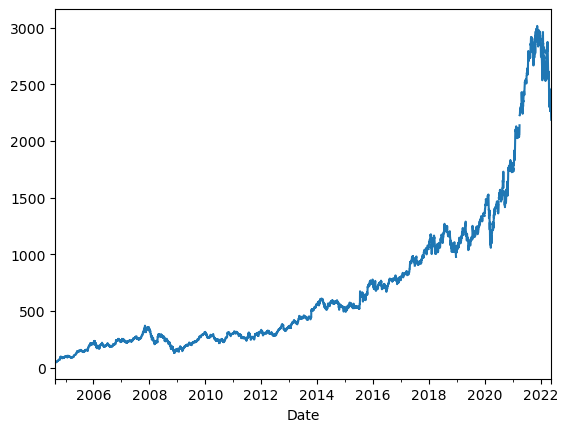

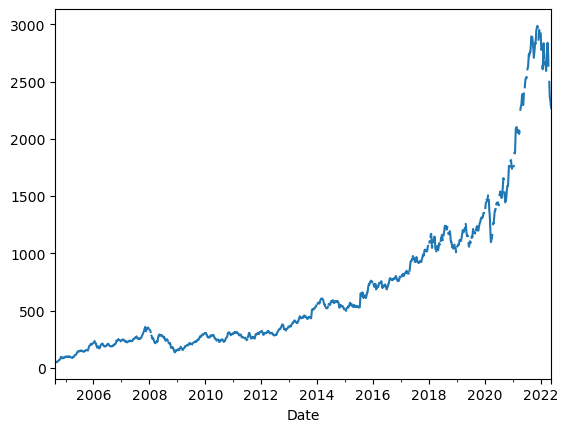

In [158]:
# plots of rolling window vs normal data

google['Close'].plot()
plt.show()
google['Close'].rolling(7).mean().plot()
plt.show()

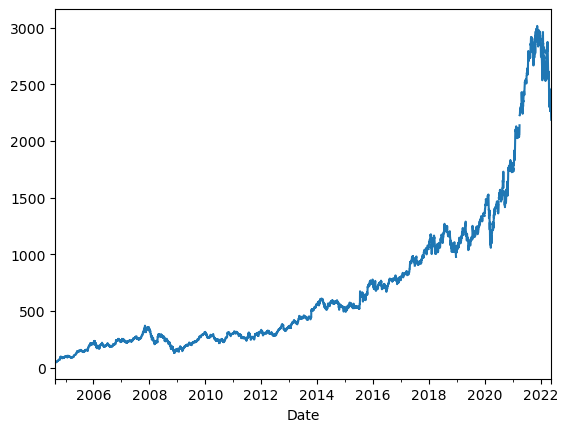

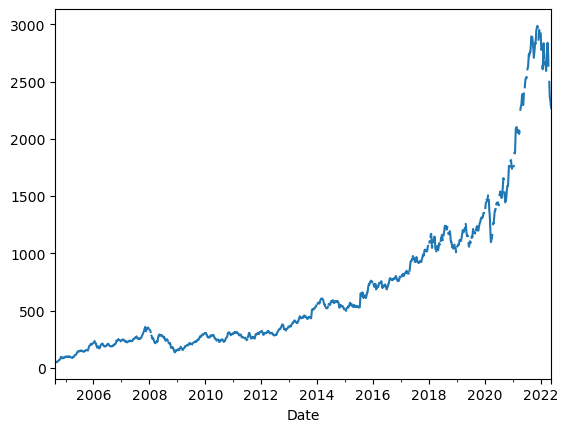

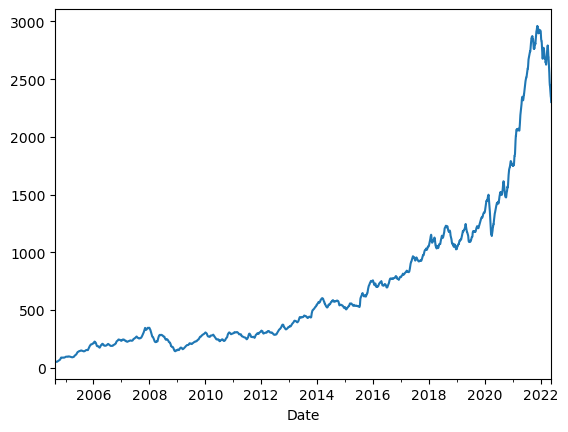

In [162]:
# exponential moving average plots

google['Close'].plot()
plt.show()
google['Close'].rolling(7).mean().plot() # moving average
plt.show()
google['Close'].ewm(7).mean().plot()  # exponential moving  average

plt.show()

### 🎲 **Shifting**

The `shift( )` function in Pandas is used to shift the entire series up or down by the desired number of periods. 

Great question again, Ali 👍 — **`shift()`** is another very important pandas function, especially in **time series analysis, feature engineering, and lagged data creation**. I’ll give you **complete notes** with **concepts, syntax, parameters, math, use cases, and examples** — so that nothing is left to learn.

---

# 📘 Pandas `shift()` (Shifting Data)

---

## 🔹 1. What is Shifting?

* **Shifting** means moving data **up or down (rows)** or **left or right (columns)** by a given number of periods.
* It’s like “lagging” or “leading” your data.
* Used heavily in **time series**, **lag features**, and **data alignment**.

👉 In simple terms:

* Positive shift → moves data **forward in time** (values go down, creating lags).
* Negative shift → moves data **backward in time** (values go up, creating leads).

---

## 🔹 2. Why Shifting? (Importance)

1. **Lag/Lead Features**:

   * In time series forecasting, you often need yesterday’s (lagged) values as predictors.
   * Example: Predict today’s sales using sales from the last 7 days.

2. **Change Calculation**:

   * To calculate differences (`today – yesterday`).
   * Useful for returns in finance (stock price changes).

3. **Data Alignment**:

   * Aligning series when comparing across different time steps.

4. **Rolling + Shift Combo**:

   * Create **moving averages of past values** (never using “future” data).

---

## 🔹 3. Syntax

```python
DataFrame.shift(periods=1, freq=None, axis=0, fill_value=None)
Series.shift(periods=1, freq=None, axis=0, fill_value=None)
```

---

## 🔹 4. Parameters

| Parameter       | Type                                    | Description                                                                                  |
| --------------- | --------------------------------------- | -------------------------------------------------------------------------------------------- |
| **periods**     | int, default = 1                        | Number of periods to shift. Positive = downward shift (lag), Negative = upward shift (lead). |
| **freq**        | DateOffset, timedelta, or str, optional | Shifts the index instead of values (for time series). E.g., `'M'` for month, `'D'` for day.  |
| **axis**        | {0, 1}, default = 0                     | Axis along which to shift. `0` = rows, `1` = columns.                                        |
| **fill\_value** | scalar, optional                        | Value to use for newly introduced missing values (`NaN` by default).                         |

---

## 🔹 5. Return Type

* Returns a **Series** or **DataFrame** with values shifted.
* Creates `NaN` in empty positions unless `fill_value` is specified.

---

## 🔹 6. Examples

### Example 1: Basic Shift

```python
import pandas as pd

s = pd.Series([10, 20, 30, 40, 50])

print(s.shift(1))
```

**Output:**

```
0     NaN
1    10.0
2    20.0
3    30.0
4    40.0
dtype: float64
```

👉 Values moved down by 1, top filled with `NaN`.

---

### Example 2: Negative Shift (Lead)

```python
print(s.shift(-1))
```

**Output:**

```
0    20.0
1    30.0
2    40.0
3    50.0
4     NaN
dtype: float64
```

👉 Values moved up by 1, bottom filled with `NaN`.

---

### Example 3: With `fill_value`

```python
print(s.shift(1, fill_value=0))
```

**Output:**

```
0     0.0
1    10.0
2    20.0
3    30.0
4    40.0
dtype: float64
```

---

### Example 4: Shifting a DataFrame

```python
df = pd.DataFrame({
    "A": [1, 2, 3, 4, 5],
    "B": [10, 20, 30, 40, 50]
})

print(df.shift(2))
```

**Output:**

```
     A     B
0  NaN   NaN
1  NaN   NaN
2  1.0  10.0
3  2.0  20.0
4  3.0  30.0
```

---

### Example 5: Shifting Along Columns

```python
print(df.shift(1, axis=1))
```

**Output:**

```
     A     B
0  NaN   1.0
1  NaN   2.0
2  NaN   3.0
3  NaN   4.0
4  NaN   5.0
```

👉 Columns shifted to the right.

---

### Example 6: Shifting Index with `freq`

```python
date_rng = pd.date_range(start="2023-01-01", periods=5, freq="D")
ts = pd.Series([100, 200, 300, 400, 500], index=date_rng)

print(ts.shift(1, freq="D"))
```

**Output (index shifted by 1 day):**

```
2023-01-02    100
2023-01-03    200
2023-01-04    300
2023-01-05    400
2023-01-06    500
Freq: D, dtype: int64
```

👉 Instead of moving values, the **index itself shifted**.

---

### Example 7: Calculating Change (Why shift is useful!)

```python
df["Price"] = [100, 105, 102, 108, 110]
df["Prev_Price"] = df["Price"].shift(1)
df["Change"] = df["Price"] - df["Prev_Price"]
print(df)
```

**Output:**

```
   Price  Prev_Price  Change
0    100         NaN     NaN
1    105       100.0     5.0
2    102       105.0    -3.0
3    108       102.0     6.0
4    110       108.0     2.0
```

👉 This is how we compute returns, deltas, or differences using `shift()`.

---

## 🔹 7. Mathematical Explanation

Let a series be $x_t$ for $t = 1, 2, 3, \dots$.

* Shifted series with `periods = k`:

$$
y_t = x_{t-k}
$$

* If $k > 0$: lag (past values).
* If $k < 0$: lead (future values).

---

## 🔹 8. Use Cases of Shifting

1. **Time Series Analysis**

   * Lag features for forecasting.
   * Compare today vs yesterday’s values.

2. **Finance**

   * Calculate stock returns:

     $$
     r_t = \frac{P_t - P_{t-1}}{P_{t-1}}
     $$

3. **Feature Engineering**

   * Create lagged predictors for machine learning.

4. **Data Alignment**

   * Match different series with different start times.

---

## 🔹 9. Difference: `shift()` vs `tshift()`

* `shift()` → moves the **data values**.
* `tshift()` (deprecated) → used to shift **time index**. Now use `shift(freq=...)`.

---

## 🔹 10. Key Points & Best Practices

* Default fills missing with `NaN`, but `fill_value` is handy.
* Use **positive `periods`** for lagging (past values).
* Use **negative `periods`** for leading (future values).
* Combine with `.diff()` for change analysis.
* For time-based data, always check if you need `freq` shift or value shift.

---
---

In [170]:
# shift

print(google['Close'])
print('\n'*2)
print(google['Close'].shift(2)) # hrr data point ko shift kr dega



Date
2004-08-19      49.982655
2004-08-20      53.952770
2004-08-23      54.495735
2004-08-24      52.239197
2004-08-25      52.802086
                 ...     
2022-05-16    2295.850098
2022-05-17    2334.030029
2022-05-18    2248.020020
2022-05-19    2214.909912
2022-05-20    2186.260010
Freq: B, Name: Close, Length: 4632, dtype: float64



Date
2004-08-19            NaN
2004-08-20            NaN
2004-08-23      49.982655
2004-08-24      53.952770
2004-08-25      54.495735
                 ...     
2022-05-16    2263.219971
2022-05-17    2330.310059
2022-05-18    2295.850098
2022-05-19    2334.030029
2022-05-20    2248.020020
Freq: B, Name: Close, Length: 4632, dtype: float64


In [171]:
print(google['Close'].shift(-2))

Date
2004-08-19      54.495735
2004-08-20      52.239197
2004-08-23      52.802086
2004-08-24      53.753517
2004-08-25      52.876804
                 ...     
2022-05-16    2248.020020
2022-05-17    2214.909912
2022-05-18    2186.260010
2022-05-19            NaN
2022-05-20            NaN
Freq: B, Name: Close, Length: 4632, dtype: float64


### Why use shifting - example

In [ ]:
df = pd.read_csv('login.csv', header= None) # header=None bcz this dataset do not have the column name
df.head()
# dataset have first column => Sr No.
# second column => user ID
# third column => login time
# fourth column => IP address

,0,1,2,3
0,1,466,2017-01-07 18:24:07,Unnamed: 3
1,2,466,2017-01-07 18:24:55,NaN
2,3,458,2017-01-07 18:25:18,NaN
3,4,458,2017-01-07 18:26:21,NaN
4,5,592,2017-01-07 19:09:59,NaN


In [177]:
df = df[[1,2]]

df.rename(columns = {
    1: 'user_id',
    2: 'login_time'
},inplace=True)

df.head()

,user_id,login_time
0,466,2017-01-07 18:24:07
1,466,2017-01-07 18:24:55
2,458,2017-01-07 18:25:18
3,458,2017-01-07 18:26:21
4,592,2017-01-07 19:09:59


### **🙋‍♂️A user come back on the website after how much time?**

In [180]:
df['user_id'].value_counts()

user_id
413     222
458     208
492     162
882     140
592     122
       ... 
1043      1
1045      1
1047      1
1048      1
880       1
Name: count, Length: 433, dtype: int64

In [183]:
# average returning time

user_df = df[df['user_id'] == 413]

user_df.head()

,user_id,login_time
11,413,2017-01-09 12:29:25
12,413,2017-01-09 12:40:39
14,413,2017-01-09 14:08:04
33,413,2017-01-10 14:36:23
35,413,2017-01-10 15:22:45


In [185]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 222 entries, 11 to 2997
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     222 non-null    int64 
 1   login_time  222 non-null    object
dtypes: int64(1), object(1)
memory usage: 5.2+ KB


In [186]:
user_df['login_time'] = pd.to_datetime(user_df['login_time'])

user_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 222 entries, 11 to 2997
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     222 non-null    int64         
 1   login_time  222 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.2 KB


C:\Users\Lappy\AppData\Local\Temp\ipykernel_10324\1008429682.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_df['login_time'] = pd.to_datetime(user_df['login_time'])


In [189]:
user_df['shifted'] = user_df['login_time'].shift(1)

C:\Users\Lappy\AppData\Local\Temp\ipykernel_10324\3509294578.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_df['shifted'] = user_df['login_time'].shift(1)


In [193]:
(user_df['login_time'] - user_df['shifted']).mean()

Timedelta('1 days 15:05:13.384615384')

Nice dataset 👍 You want to measure **user comeback time** (i.e., the time gap between consecutive logins of the same user). That’s a very common problem in **user behavior analysis**. Let’s break it down step by step.

---

## 1️⃣ Your Dataset

```text
user_id    login_time
466        2017-01-07 18:24:07
466        2017-01-07 18:24:55
458        2017-01-07 18:25:18
458        2017-01-07 18:26:21
592        2017-01-07 19:09:59
...
```

* Multiple `user_id`s.
* `login_time` is a **timestamp**.
* We need the **time difference between two logins of the same user**.

---

## 2️⃣ Steps to Solve

1. Convert `login_time` to `datetime`.
2. Sort by `user_id` and `login_time`.
3. Use `.groupby('user_id')` and `diff()` on `login_time` to calculate **comeback time**.

---

## 3️⃣ Code

```python
import pandas as pd

# Example data
data = {
    "user_id": [466, 466, 458, 458, 592],
    "login_time": [
        "2017-01-07 18:24:07",
        "2017-01-07 18:24:55",
        "2017-01-07 18:25:18",
        "2017-01-07 18:26:21",
        "2017-01-07 19:09:59"
    ]
}

df = pd.DataFrame(data)

# Step 1: Convert login_time to datetime
df["login_time"] = pd.to_datetime(df["login_time"])

# Step 2: Sort by user and time
df = df.sort_values(by=["user_id", "login_time"])

# Step 3: Find comeback time per user
df["comeback_time"] = df.groupby("user_id")["login_time"].diff()

print(df)
```

---

## 4️⃣ Output

```
   user_id          login_time   comeback_time
2      458 2017-01-07 18:25:18             NaT
3      458 2017-01-07 18:26:21   0 days 00:01:03
0      466 2017-01-07 18:24:07             NaT
1      466 2017-01-07 18:24:55   0 days 00:00:48
4      592 2017-01-07 19:09:59             NaT
```

👉 For each user:

* First login → `NaT` (no comeback yet).
* Later logins → comeback time.

---

## 5️⃣ Extra Analysis You Can Do

1. **Average comeback time per user**

```python
avg_comeback = df.groupby("user_id")["comeback_time"].mean()
print(avg_comeback)
```

2. **Overall distribution of comeback times**

```python
import matplotlib.pyplot as plt

df["comeback_time"].dropna().dt.total_seconds().plot(kind="hist", bins=20)
plt.xlabel("Comeback Time (seconds)")
plt.title("Distribution of User Comeback Times")
plt.show()
```

3. **Convert comeback time to minutes/hours**

```python
df["comeback_minutes"] = df["comeback_time"].dt.total_seconds() / 60
```

---

✅ With this, you can analyze how often users return to your website.

---
---
